###Preparação da Tabela

In [3]:
import numpy as np

In [4]:
import pandas as pd
df_heart_failure = pd.read_csv('/content/drive/MyDrive/heart_failure/heart_failure_clinical_records_dataset.csv', usecols={'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking',	'time', 'DEATH_EVENT'})
df_heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
df_heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df_heart_failure.isnull().sum()

# Caso tenha algum valor nulo: df_heart_failure = df_heart_failure.dropna()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df_heart_failure['creatinine_phosphokinase'].value_counts()


582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64

In [8]:
df_heart_failure['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

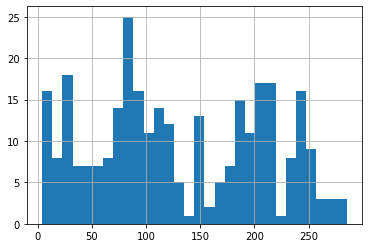

In [9]:
grafio = df_heart_failure['time'].hist(bins=30)

### Remoção de Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='creatinine_phosphokinase'>

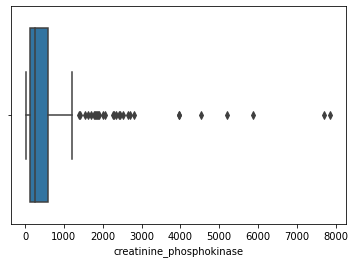

In [10]:
import seaborn as sns
sns.boxplot(df_heart_failure['creatinine_phosphokinase'])

In [11]:
ndf = ''

In [12]:
Q1 = df_heart_failure['creatinine_phosphokinase'].quantile(0.25)
Q3 = df_heart_failure['creatinine_phosphokinase'].quantile(0.75)
IQR = Q3 - Q1
filter = (df_heart_failure['creatinine_phosphokinase'] >= Q1 - 1.5 * IQR) & (df_heart_failure['creatinine_phosphokinase'] <= Q3 + 1.5 *IQR)
ndf = df_heart_failure.loc[filter]
print(ndf.shape)

(270, 13)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ejection_fraction'>

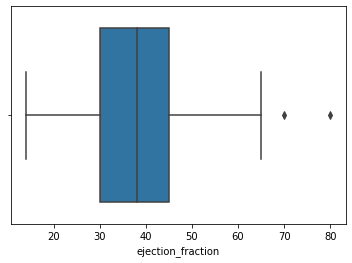

In [13]:
sns.boxplot(ndf['ejection_fraction'])

In [14]:
Q1 = ndf['ejection_fraction'].quantile(0.25)
Q3 = ndf['ejection_fraction'].quantile(0.75)
IQR = Q3 - Q1
filter = (ndf['ejection_fraction'] >= Q1 - 1.5 * IQR) & (ndf['ejection_fraction'] <= Q3 + 1.5 *IQR)
ndf = ndf.loc[filter]
print(ndf.shape)

(268, 13)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='platelets'>

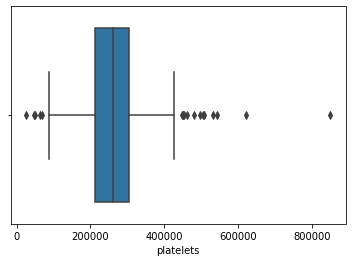

In [15]:
sns.boxplot(ndf['platelets'])

In [16]:
Q1 = ndf['platelets'].quantile(0.25)
Q3 = ndf['platelets'].quantile(0.75)
IQR = Q3 - Q1
filter = (ndf['platelets'] >= Q1 - 1.5 * IQR) & (ndf['platelets'] <= Q3 + 1.5 *IQR)
ndf = ndf.loc[filter]
print(ndf.shape)

(250, 13)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='serum_creatinine'>

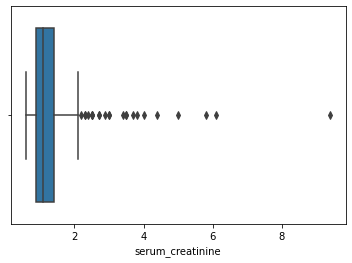

In [17]:
sns.boxplot(ndf['serum_creatinine'])

In [18]:
Q1 = ndf['serum_creatinine'].quantile(0.25)
Q3 = ndf['serum_creatinine'].quantile(0.75)
IQR = Q3 - Q1
filter = (ndf['serum_creatinine'] >= Q1 - 1.5 * IQR) & (ndf['serum_creatinine'] <= Q3 + 1.5 *IQR)
ndf = ndf.loc[filter]
print(ndf.shape)

(227, 13)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='serum_sodium'>

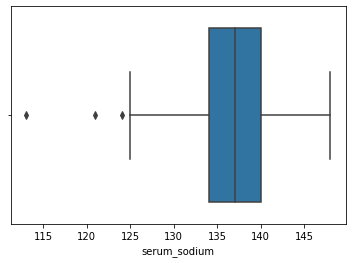

In [19]:
sns.boxplot(ndf['serum_sodium'])

In [20]:
Q1 = ndf['serum_sodium'].quantile(0.25)
Q3 = ndf['serum_sodium'].quantile(0.75)
IQR = Q3 - Q1
filter = (ndf['serum_sodium'] >= Q1 - 1.5 * IQR) & (ndf['serum_sodium'] <= Q3 + 1.5 *IQR)
ndf = ndf.loc[filter]
print(ndf.shape)

(224, 13)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time'>

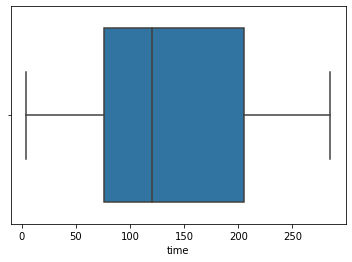

In [21]:
sns.boxplot(ndf['time'])

In [22]:
ndf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


In [23]:
df_heart = ndf

### Preparar dados de treino e teste

In [24]:
# Separando o X e o Y
features = df_heart.drop(['DEATH_EVENT'], axis=1) # Caso tenha um ID, também é necessário dropa-los aqui
x = features

y = df_heart[['DEATH_EVENT']]

In [25]:
df_heart['DEATH_EVENT'].value_counts()

0    163
1     61
Name: DEATH_EVENT, dtype: int64

In [26]:
# Under Sampling
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(random_state=0)
#x_resampled, y_resampled = rus.fit_resample(x, y)

In [27]:
# Over Sampling
from imblearn.over_sampling import SMOTE, ADASYN

x_resampled, y_resampled = SMOTE().fit_resample(x, y)

In [28]:
y_resampled['DEATH_EVENT'].value_counts()

1    163
0    163
Name: DEATH_EVENT, dtype: int64

In [29]:
# Dividindo dados para treino e dados para teste
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [30]:
# Instaciando o objeto scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit + transform no conjunto de treino
# Utilizando explicitamente as colunas de ambos os lados força que o
# resultado da normalização ainda seja o dataframe (muito mais facil de manipular) e não um numpy array
x_train[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']] = scaler.fit_transform(x_train[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']])

# Agora utilizando o scaler no conjunto de teste
# Utilizar apenas o transform, pois fit é só no conjunto de treino,]
# o conjunto de teste é utilizado para medir a capacidade de generalização do modelo no mundo real (dados não vistos)
# então faz sentido que a mesma normalização treinada e submetida ao conjunto de treino seja apenas aplicada no de teste
x_test[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']] = scaler.transform(x_test[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']])


### Regressão Logistica

In [31]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(solver='lbfgs', max_iter=500)
modelo_lr.fit(x_train, y_train.squeeze())

print('Acertividade treino: ', modelo_lr.score(x_train, y_train))
print('Acertividade teste: ', modelo_lr.score(x_test, y_test.squeeze()))

Acertividade treino:  0.8576923076923076
Acertividade teste:  0.7727272727272727


In [33]:
from sklearn.metrics import recall_score, precision_score, f1_score

y_pred = modelo_lr.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred ))

Revocação:  0.8387096774193549


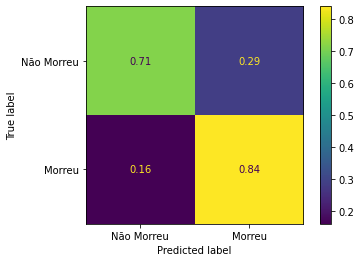

In [34]:
# Matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

matriz_confusao = confusion_matrix(y_test, y_pred, normalize = 'true')

display = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['Não Morreu', 'Morreu'])

display.plot()
plt.show()

###Pycaret

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8

In [ ]:
train = df_heart.sample(frac=0.9, random_state=786)
test = df_heart.drop(train.index)

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

In [ ]:
from pycaret.classification import *

In [ ]:
s = setup(train, target='DEATH_EVENT', session_id=1, fix_imbalance=True) # Caso a tabela tenha id, usar: ignore_features=['id']

In [ ]:
best = compare_models()

In [ ]:
evaluate_model(best)

In [ ]:
tuned = tune_model(best)

In [ ]:
prediction = predict_model(tuned, data=test)

In [ ]:
prediction

###Funções extras

In [ ]:
# One hot in code
#df_infos = pd.get_dummies(df_infos, columns=["TRANSPORTE"])

# transformar false e true em 1 e 0
#df_infos.loc[df_infos['AUTO_ACEITE'] == True, 'AUTO_ACEITE'] = 1
#df_infos.loc[df_infos['AUTO_ACEITE'] == False, 'AUTO_ACEITE'] = 0

# Split de elementos
#df[['Date', 'exclude']] = df['ULTIMO_PEDIDO'].str.split('T', expand=True)

# Descobrir valor maximo
# df['Date'].max()